In [1]:
import pandas as pd
import json

data = []

with open("word_count/word_count_25.json", 'r') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

df = pd.DataFrame(data).transpose()
df.columns = ['count']
df['count'] = pd.to_numeric(df['count'])  #데이터 타입을 숫자로 변환

# 언더바(_)를 기준으로 앞 단어는 word, 뒤 단어는 tag 컬럼으로 분리
df['word'] = df.index.map(lambda x: x.split('_')[0])
df['tag'] = df.index.map(lambda x: x.split('_')[1])

# 정리
df.reset_index(drop=True, inplace=True)
df = df[['word', 'tag', 'count']]
df

,word,tag,count
0,현대,NNP,1458
1,과학,NNG,14355
2,시대,NNG,35605
3,앞,NNG,170296
4,더욱,MAG,51777
...,...,...,...
1167562,황구렁이,NNP,1
1167563,석구렁이,NNP,1
1167564,흑질뱅이,NNP,1
1167565,호미부,NNG,1


### 전체 빈도 수 합

In [2]:
count_sum = df['count'].sum()
df["count_prop"] = df["count"] / count_sum
df

,word,tag,count,count_prop
0,현대,NNP,1458,1.582003e-05
1,과학,NNG,14355,1.557590e-04
2,시대,NNG,35605,3.863322e-04
3,앞,NNG,170296,1.847797e-03
4,더욱,MAG,51777,5.618065e-04
...,...,...,...,...
1167562,황구렁이,NNP,1,1.085050e-08
1167563,석구렁이,NNP,1,1.085050e-08
1167564,흑질뱅이,NNP,1,1.085050e-08
1167565,호미부,NNG,1,1.085050e-08


In [3]:
count_sum

92161623

### cutoff에 따른 빈도 수 분류

In [4]:
cutoffs = [10, 50, 100]

for cutoff in cutoffs:
    count_below = (df['count'] <= cutoff).sum()
    print(f"cutoff {cutoff}: {count_below} words")

cutoff 10: 1014537 words
cutoff 50: 1109344 words
cutoff 100: 1128379 words


### 빈도 수 시각화
x를 index로 하고, y를 빈도 수로 하는 scatter plot으로 시각화

In [5]:
# 빈도 수 기준 오름차순 정렬
sorted_df = df.sort_values(by='count', ascending=True)

# 인덱스 번호 리셋
sorted_df.reset_index(drop=True, inplace=True)

partial_df = sorted_df.head(1000)
partial_df

,word,tag,count,count_prop
0,저날,NNP,1,1.085050e-08
1,뒤졋기,VV,1,1.085050e-08
2,니미아미타불,NNG,1,1.085050e-08
3,주인궐,NNG,1,1.085050e-08
4,배이치사,NNG,1,1.085050e-08
...,...,...,...,...
995,전성어,NNG,1,1.085050e-08
996,왕패풍,NNG,1,1.085050e-08
997,심벌튼,NNG,1,1.085050e-08
998,정석보,NNP,1,1.085050e-08


1000개 모두 count가 1인 관계로, count=1이 몇 번째 행까지 이어지는지 확인

In [6]:
index = sorted_df[sorted_df['count'] == 1].index.max()
print("마지막으로 'count'가 1인 행 번호:", index)

마지막으로 'count'가 1인 행 번호: 654170


# 지프의 법칙

In [7]:
# 가장 큰 값
max_count = sorted_df["count"].iloc[-1]
max_count

1719473

In [8]:
sorted_df["zipf's_law"] = max_count / sorted_df["count"]
sorted_df

,word,tag,count,count_prop,zipf's_law
0,저날,NNP,1,1.085050e-08,1.719473e+06
1,뒤졋기,VV,1,1.085050e-08,1.719473e+06
2,니미아미타불,NNG,1,1.085050e-08,1.719473e+06
3,주인궐,NNG,1,1.085050e-08,1.719473e+06
4,배이치사,NNG,1,1.085050e-08,1.719473e+06
...,...,...,...,...,...
1167562,사람,NNG,701971,7.616739e-03,2.449493e+00
1167563,되,VV,899517,9.760212e-03,1.911551e+00
1167564,없,VA,901000,9.776304e-03,1.908405e+00
1167565,있,VA,1356829,1.472228e-02,1.267273e+00


In [9]:
df_over1 = sorted_df[sorted_df["count"] > 1].reset_index(drop=True)
df_over10 = sorted_df[sorted_df["count"] > 10].reset_index(drop=True)
df_over50 = sorted_df[sorted_df["count"] > 50].reset_index(drop=True)
df_over100 = sorted_df[sorted_df["count"] > 100].reset_index(drop=True)

print(df_over1.shape)
print(df_over10.shape)
print(df_over50.shape)
print(df_over100.shape)

(513396, 5)
(153030, 5)
(58223, 5)
(39188, 5)


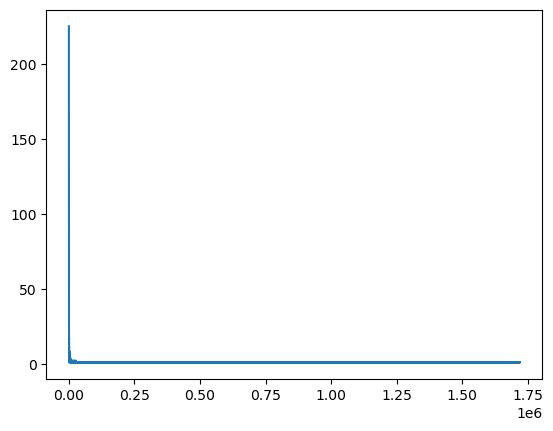

In [10]:
import matplotlib.pyplot as plt

plt.plot(df_over100["count"].value_counts())

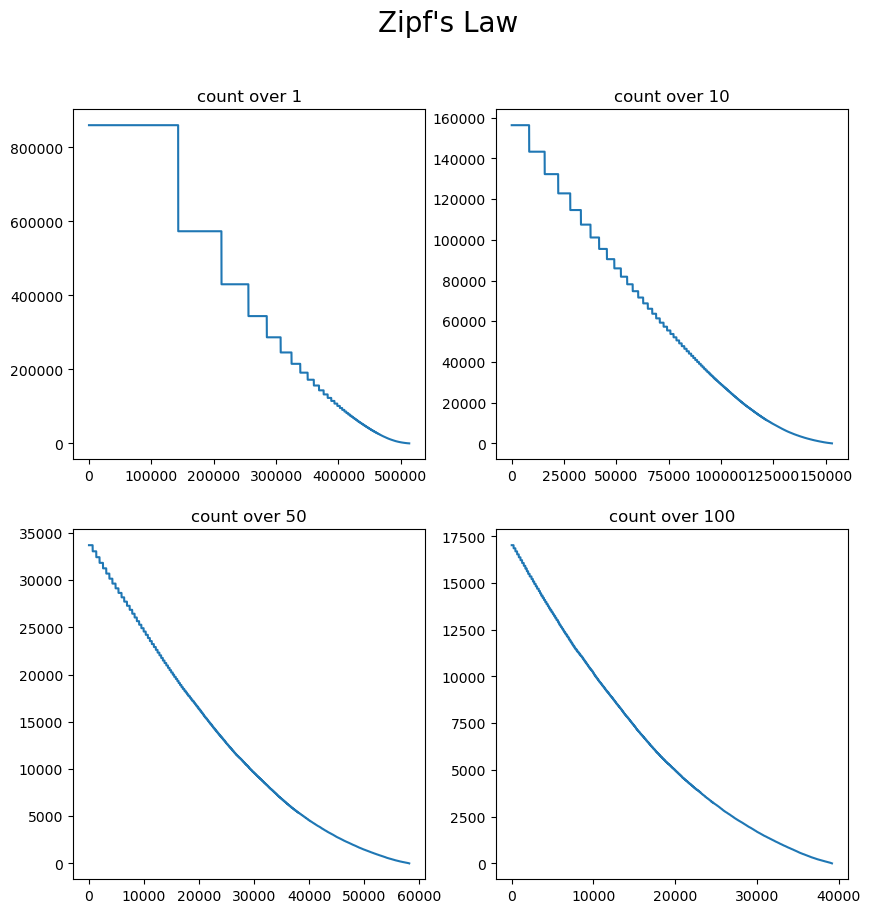

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)
axes = axes.flatten()

axes[0].plot(df_over1.index, df_over1["zipf\'s_law"])
axes[0].set_title("count over 1")
axes[1].plot(df_over10.index, df_over10["zipf\'s_law"])
axes[1].set_title("count over 10")
axes[2].plot(df_over50.index, df_over50["zipf\'s_law"])
axes[2].set_title("count over 50")
axes[3].plot(df_over100.index, df_over100["zipf\'s_law"])
axes[3].set_title("count over 100")

plt.suptitle("Zipf's Law", fontsize=20)
plt.show()

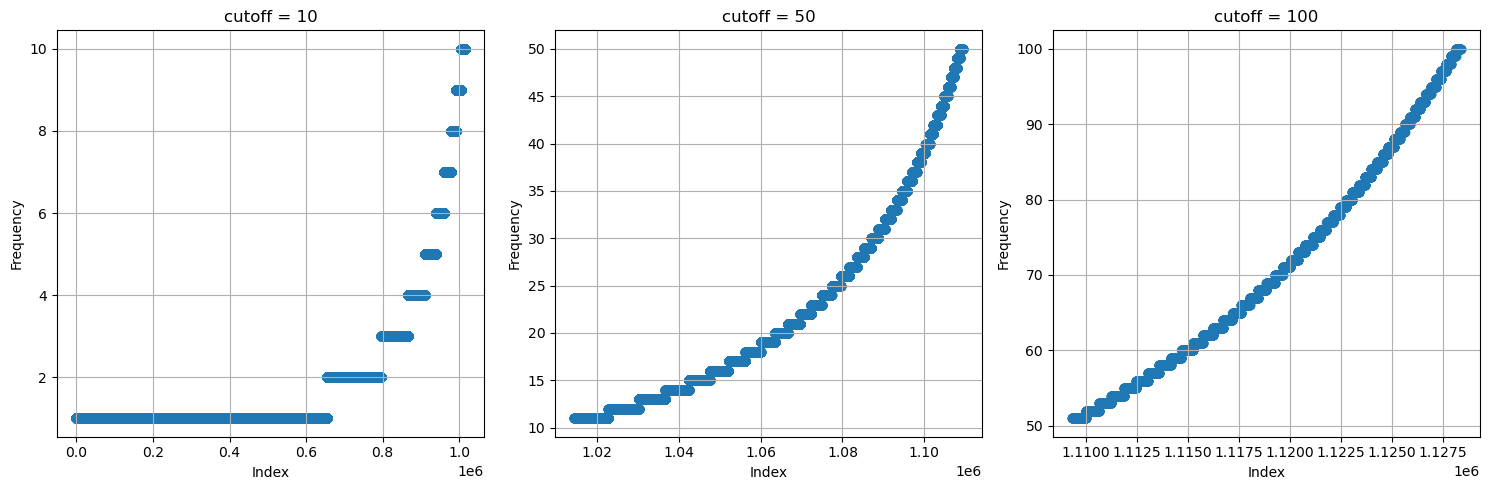

In [12]:
import matplotlib.pyplot as plt

# 범위별 데이터 선택
plot_data_10 = sorted_df.iloc[:1014537]
plot_data_50 = sorted_df.iloc[1014537:1109344]
plot_data_100 = sorted_df.iloc[1109344:1128379]

# scatter plot 생성
plt.figure(figsize=(15, 5))

# cutoff = 10
plt.subplot(1, 3, 1)
plt.scatter(plot_data_10.index, plot_data_10['count'], alpha=0.5)
plt.title('cutoff = 10')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.grid(True)

# cutoff = 50
plt.subplot(1, 3, 2)
plt.scatter(plot_data_50.index, plot_data_50['count'], alpha=0.5)
plt.title('cutoff = 50')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.grid(True)

# cutoff = 100
plt.subplot(1, 3, 3)
plt.scatter(plot_data_100.index, plot_data_100['count'], alpha=0.5)
plt.title('cutoff = 100')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.grid(True)

# 전체 그래프 조정
plt.tight_layout()
plt.show()

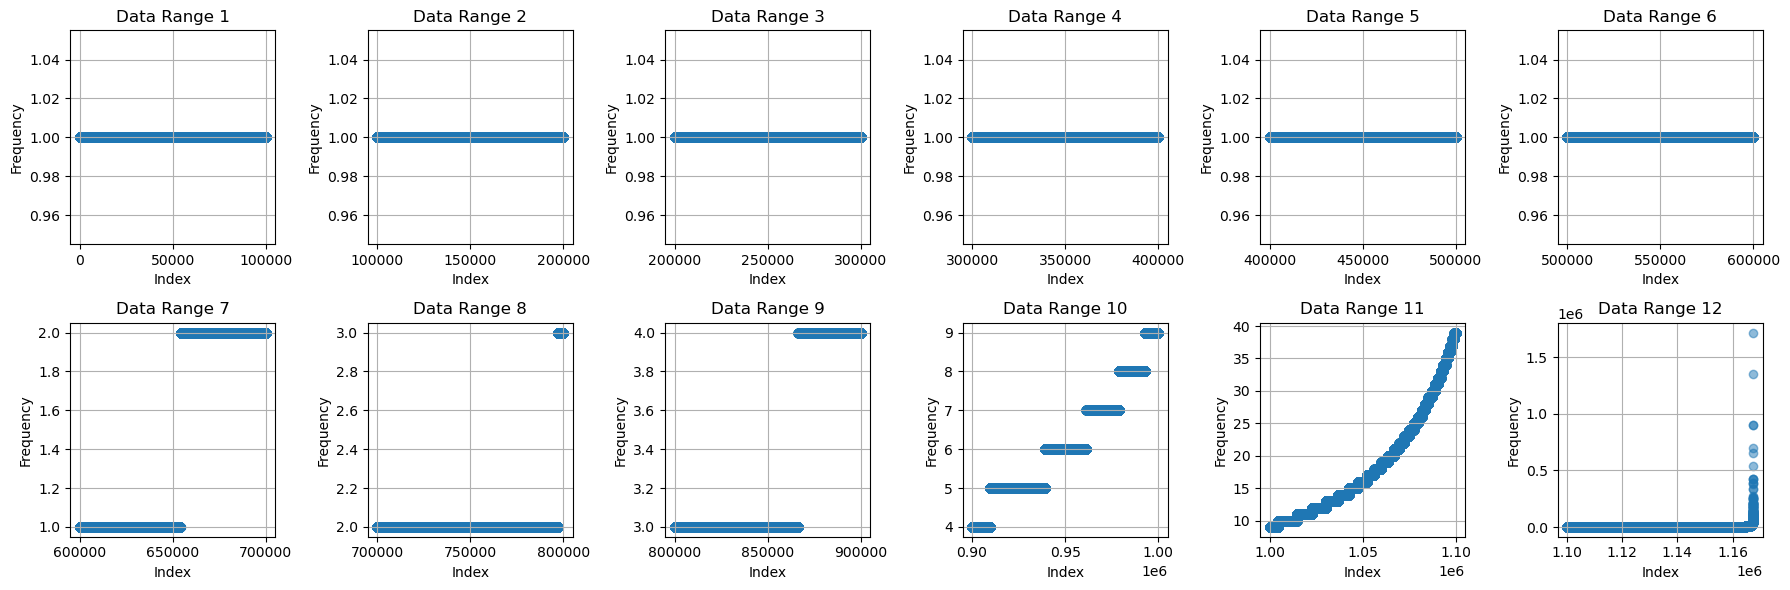

In [13]:
import matplotlib.pyplot as plt

plot_data_list = []

for i in range(0, len(sorted_df), 100000):
    # 마지막 범위는 나머지 모든 데이터 포함
    if i + 100000 >= len(sorted_df):
        plot_data_list.append(sorted_df.iloc[i:])
    else:
        plot_data_list.append(sorted_df.iloc[i:i+100000])

plt.figure(figsize=(18, 6))

# 각 데이터 범위별로 subplot 생성
for i, plot_data in enumerate(plot_data_list, start=1):
    plt.subplot(2, 6, i)
    plt.scatter(plot_data.index, plot_data['count'], alpha=0.5)
    plt.title(f'Data Range {i}')
    plt.xlabel('Index')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()

plt.show()

Data range 12 (1100000~1167567) 은 다른 부분에 비해 범위가 좁음에도 불구하고 급격한 변화가 드러남. 이 부분에 주의할 필요가 있음

In [14]:
df_over100.to_csv("word_count_over100.csv", index=False)

# 빈도수 검색량

In [16]:
import pandas as pd

df_search = pd.read_csv("search_keywords.csv")
df_word_count = pd.read_csv("word_count.csv")

C:\Users\Junho\AppData\Local\Temp\ipykernel_19044\1520190346.py:3: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_search = pd.read_csv("search_keywords.csv")


In [17]:
df_word_count

,word,tag,count
0,저날,NNP,1
1,뒤졋기,VV,1
2,니미아미타불,NNG,1
3,주인궐,NNG,1
4,배이치사,NNG,1
...,...,...,...
1167562,사람,NNG,701971
1167563,되,VV,899517
1167564,없,VA,901000
1167565,있,VA,1356829


In [18]:
drop_cols = ['monthlyAvePcClkCnt', 'monthlyAveMobileClkCnt', 'monthlyAvePcCtr', 'monthlyAveMobileCtr', 'plAvgDepth']

df_search = df_search.drop(columns=drop_cols)

df_search

,relKeyword,monthlyPcQcCnt,monthlyMobileQcCnt,compIdx
0,Dummy,0,0,낮음
1,Dummy,0,0,낮음
2,Dummy,0,0,낮음
3,Dummy,0,0,낮음
4,Dummy,0,0,낮음
...,...,...,...,...
1167562,사람,4030,14100,높음
1167563,되,960,5940,낮음
1167564,없,20,230,낮음
1167565,있,20,270,낮음


In [19]:
df_word_count_over100 = df_word_count[df_word_count["count"] > 100].reset_index(drop=True)
df_word_count_over100

,word,tag,count
0,페리오스,NNP,101
1,아츰,NNG,101
2,오도문,NNG,101
3,무라야마,NNP,101
4,장포,NNP,101
...,...,...,...
39183,사람,NNG,701971
39184,되,VV,899517
39185,없,VA,901000
39186,있,VA,1356829


In [20]:
drop_rows = len(df_search) - len(df_word_count_over100)

df_search_over100 = df_search.iloc[drop_rows:, :].reset_index(drop=True)
df_search_over100

,relKeyword,monthlyPcQcCnt,monthlyMobileQcCnt,compIdx
0,페리오스,< 10,< 10,낮음
1,아츰,< 10,70,낮음
2,오도문,< 10,130,낮음
3,무라야마,140,580,중간
4,장포,190,580,중간
...,...,...,...,...
39183,사람,4030,14100,높음
39184,되,960,5940,낮음
39185,없,20,230,낮음
39186,있,20,270,낮음


### < 10 처리하기

In [21]:
df_search_over100.loc[df_search_over100["monthlyPcQcCnt"] == "< 10", "monthlyPcQcCnt"] = 5
df_search_over100

,relKeyword,monthlyPcQcCnt,monthlyMobileQcCnt,compIdx
0,페리오스,5,< 10,낮음
1,아츰,5,70,낮음
2,오도문,5,130,낮음
3,무라야마,140,580,중간
4,장포,190,580,중간
...,...,...,...,...
39183,사람,4030,14100,높음
39184,되,960,5940,낮음
39185,없,20,230,낮음
39186,있,20,270,낮음


In [22]:
df_search_over100.loc[df_search_over100["monthlyMobileQcCnt"] == "< 10", "monthlyMobileQcCnt"] = 5
df_search_over100

,relKeyword,monthlyPcQcCnt,monthlyMobileQcCnt,compIdx
0,페리오스,5,5,낮음
1,아츰,5,70,낮음
2,오도문,5,130,낮음
3,무라야마,140,580,중간
4,장포,190,580,중간
...,...,...,...,...
39183,사람,4030,14100,높음
39184,되,960,5940,낮음
39185,없,20,230,낮음
39186,있,20,270,낮음


In [23]:
df_search_over100["monthlyPcQcCnt"] = df_search_over100["monthlyPcQcCnt"].astype("int64")
df_search_over100["monthlyMobileQcCnt"] = df_search_over100["monthlyMobileQcCnt"].astype("int64")

df_search_over100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   relKeyword          39188 non-null  object
 1   monthlyPcQcCnt      39188 non-null  int64 
 2   monthlyMobileQcCnt  39188 non-null  int64 
 3   compIdx             39188 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [24]:
df_search_count_over5 = df_search_over100[df_search_over100["monthlyPcQcCnt"] > 5]

c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


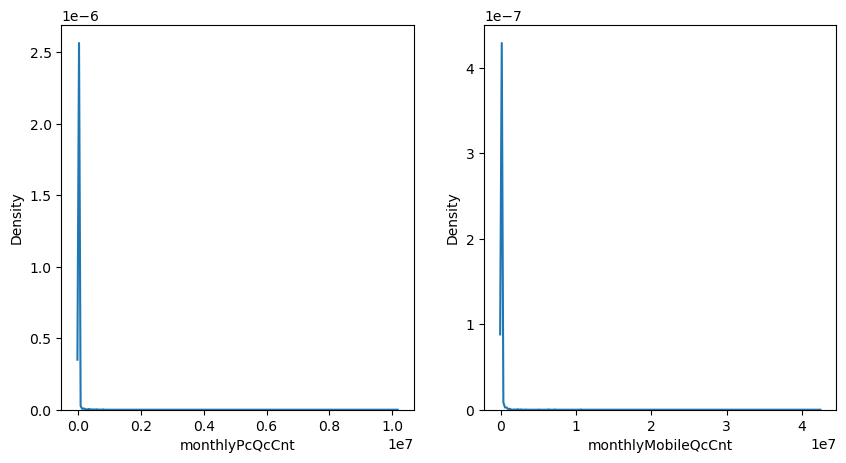

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.flatten()

sns.kdeplot(df_search_count_over5["monthlyPcQcCnt"], ax=axes[0])
sns.kdeplot(df_search_count_over5["monthlyMobileQcCnt"], ax=axes[1])

plt.show()

In [26]:
df_search_over100["searchCnt"] = df_search_over100["monthlyPcQcCnt"] + df_search_over100["monthlyMobileQcCnt"]
df_search_over100

,relKeyword,monthlyPcQcCnt,monthlyMobileQcCnt,compIdx,searchCnt
0,페리오스,5,5,낮음,10
1,아츰,5,70,낮음,75
2,오도문,5,130,낮음,135
3,무라야마,140,580,중간,720
4,장포,190,580,중간,770
...,...,...,...,...,...
39183,사람,4030,14100,높음,18130
39184,되,960,5940,낮음,6900
39185,없,20,230,낮음,250
39186,있,20,270,낮음,290


In [27]:
df_word_count_over100["searchCnt"] = df_search_over100["searchCnt"]
df_word_count_over100["compIdx"] = df_search_over100["compIdx"]
df_word_count_over100

,word,tag,count,searchCnt,compIdx
0,페리오스,NNP,101,10,낮음
1,아츰,NNG,101,75,낮음
2,오도문,NNG,101,135,낮음
3,무라야마,NNP,101,720,중간
4,장포,NNP,101,770,중간
...,...,...,...,...,...
39183,사람,NNG,701971,18130,높음
39184,되,VV,899517,6900,낮음
39185,없,VA,901000,250,낮음
39186,있,VA,1356829,290,낮음


### 클러스터링

<Axes: xlabel='count', ylabel='searchCnt'>

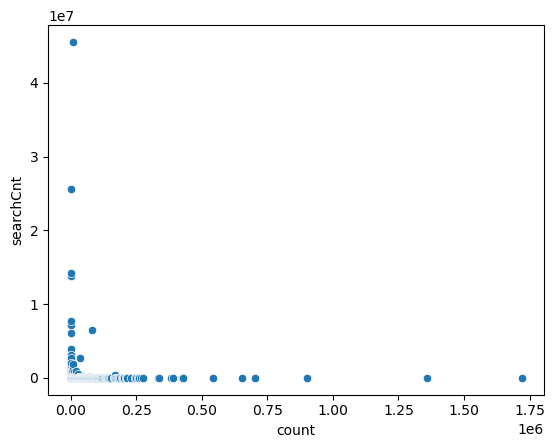

In [28]:
sns.scatterplot(data=df_word_count_over100, x="count", y="searchCnt")

In [29]:
df_word_count_over100 = df_word_count_over100.drop(index=[2649, 9958]).reset_index(drop=True)
df_word_count_over100

,word,tag,count,searchCnt,compIdx
0,페리오스,NNP,101,10,낮음
1,아츰,NNG,101,75,낮음
2,오도문,NNG,101,135,낮음
3,무라야마,NNP,101,720,중간
4,장포,NNP,101,770,중간
...,...,...,...,...,...
39181,사람,NNG,701971,18130,높음
39182,되,VV,899517,6900,낮음
39183,없,VA,901000,250,낮음
39184,있,VA,1356829,290,낮음


In [30]:
df_word_count_over100["compDiff"] = df_word_count_over100["searchCnt"] / df_word_count_over100["count"]
df_word_count_over100

,word,tag,count,searchCnt,compIdx,compDiff
0,페리오스,NNP,101,10,낮음,0.099010
1,아츰,NNG,101,75,낮음,0.742574
2,오도문,NNG,101,135,낮음,1.336634
3,무라야마,NNP,101,720,중간,7.128713
4,장포,NNP,101,770,중간,7.623762
...,...,...,...,...,...,...
39181,사람,NNG,701971,18130,높음,0.025827
39182,되,VV,899517,6900,낮음,0.007671
39183,없,VA,901000,250,낮음,0.000277
39184,있,VA,1356829,290,낮음,0.000214


In [31]:
import numpy as np

df_log = df_word_count_over100.copy()
df_log["log_count"] = df_log["count"].apply(lambda x: np.log(1+x))
df_log["log_searchCnt"] = df_log["searchCnt"].apply(lambda x: np.log(1+x))
df_log["log_compDiff"] = df_log["compDiff"].apply(lambda x: np.log(1+x))

df_log

,word,tag,count,searchCnt,compIdx,compDiff,log_count,log_searchCnt,log_compDiff
0,페리오스,NNP,101,10,낮음,0.099010,4.624973,2.397895,0.094410
1,아츰,NNG,101,75,낮음,0.742574,4.624973,4.330733,0.555363
2,오도문,NNG,101,135,낮음,1.336634,4.624973,4.912655,0.848711
3,무라야마,NNP,101,720,중간,7.128713,4.624973,6.580639,2.095403
4,장포,NNP,101,770,중간,7.623762,4.624973,6.647688,2.154521
...,...,...,...,...,...,...,...,...,...
39181,사람,NNG,701971,18130,높음,0.025827,13.461649,9.805378,0.025499
39182,되,VV,899517,6900,낮음,0.007671,13.709614,8.839422,0.007642
39183,없,VA,901000,250,낮음,0.000277,13.711262,5.525453,0.000277
39184,있,VA,1356829,290,낮음,0.000214,14.120662,5.673323,0.000214


In [32]:
df_log["word_len"] = df_log["word"].apply(lambda x: len(x))
df_log

,word,tag,count,searchCnt,compIdx,compDiff,log_count,log_searchCnt,log_compDiff,word_len
0,페리오스,NNP,101,10,낮음,0.099010,4.624973,2.397895,0.094410,4
1,아츰,NNG,101,75,낮음,0.742574,4.624973,4.330733,0.555363,2
2,오도문,NNG,101,135,낮음,1.336634,4.624973,4.912655,0.848711,3
3,무라야마,NNP,101,720,중간,7.128713,4.624973,6.580639,2.095403,4
4,장포,NNP,101,770,중간,7.623762,4.624973,6.647688,2.154521,2
...,...,...,...,...,...,...,...,...,...,...
39181,사람,NNG,701971,18130,높음,0.025827,13.461649,9.805378,0.025499,2
39182,되,VV,899517,6900,낮음,0.007671,13.709614,8.839422,0.007642,1
39183,없,VA,901000,250,낮음,0.000277,13.711262,5.525453,0.000277,1
39184,있,VA,1356829,290,낮음,0.000214,14.120662,5.673323,0.000214,1


In [33]:
df_log[df_log["word_len"] == 9]

,word,tag,count,searchCnt,compIdx,compDiff,log_count,log_searchCnt,log_compDiff,word_len
7939,떠블유떠블유떠블유,NNG,151,10,낮음,0.066225,5.023881,2.397895,0.064125,9


In [34]:
df_log["log_compDiff"].max()

11.011342666898626

c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='log_compDiff', ylabel='Density'>

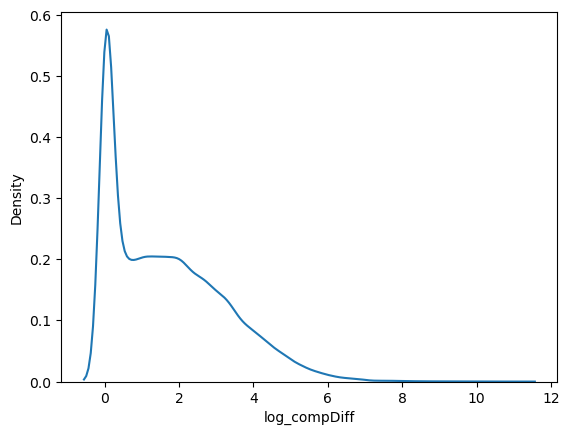

In [35]:
sns.kdeplot(df_log["log_compDiff"])

c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='log_count', ylabel='Density'>

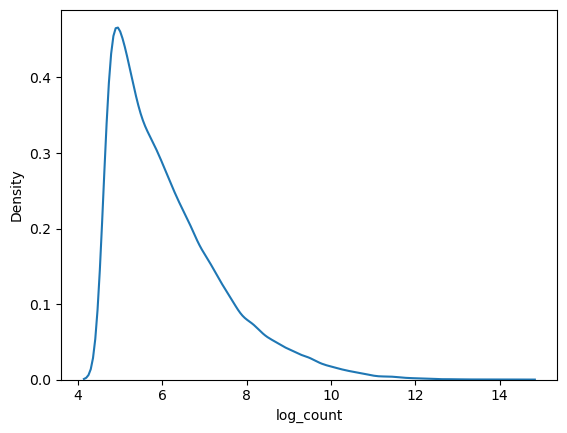

In [36]:
sns.kdeplot(df_log["log_count"])

c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='log_searchCnt', ylabel='Density'>

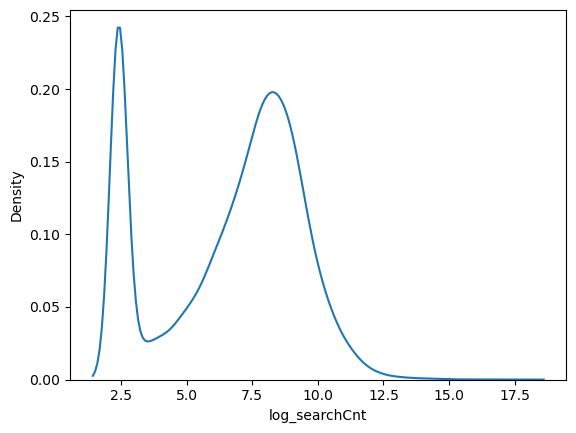

In [37]:
sns.kdeplot(df_log["log_searchCnt"])

Text(0.5, 1.0, 'Count-SearchCnt Plot')

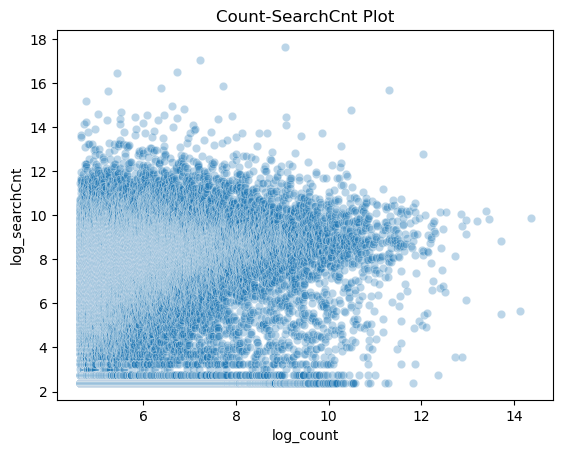

In [38]:
import seaborn as sns

sns.scatterplot(data=df_log, x="log_count", y="log_searchCnt", alpha=0.3)
plt.title("Count-SearchCnt Plot")

In [39]:
X = [[log_count, log_searchCnt] for log_count, log_searchCnt in zip(df_log["log_count"], df_log["log_searchCnt"])]
X

[[4.624972813284271, 2.3978952727983707],
 [4.624972813284271, 4.330733340286331],
 [4.624972813284271, 4.912654885736052],
 [4.624972813284271, 6.580639137284949],
 [4.624972813284271, 6.647688373563329],
 [4.624972813284271, 10.2328272702548],
 [4.624972813284271, 8.429672593886743],
 [4.624972813284271, 8.575650760987806],
 [4.624972813284271, 5.860786223465865],
 [4.624972813284271, 6.493753839851686],
 [4.624972813284271, 6.825460036255307],
 [4.624972813284271, 2.3978952727983707],
 [4.624972813284271, 6.836259277277067],
 [4.624972813284271, 6.93828448401696],
 [4.624972813284271, 6.066108090103747],
 [4.624972813284271, 5.831882477283517],
 [4.624972813284271, 4.02535169073515],
 [4.624972813284271, 8.729235349659273],
 [4.624972813284271, 5.5254529391317835],
 [4.624972813284271, 4.875197323201151],
 [4.624972813284271, 2.772588722239781],
 [4.624972813284271, 5.303304908059076],
 [4.624972813284271, 8.830689198760998],
 [4.624972813284271, 2.3978952727983707],
 [4.62497281328

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, 'single')

In [44]:
linked.shape

(39185, 4)

In [46]:
linked

array([[0.00000000e+00, 1.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.30000000e+01, 3.91860000e+04, 0.00000000e+00, 3.00000000e+00],
       [2.60000000e+01, 3.91870000e+04, 0.00000000e+00, 4.00000000e+00],
       ...,
       [7.83660000e+04, 7.83670000e+04, 1.23593915e+00, 3.91840000e+04],
       [3.91420000e+04, 7.83680000e+04, 1.80802594e+00, 3.91850000e+04],
       [3.75770000e+04, 7.83690000e+04, 1.92556638e+00, 3.91860000e+04]])

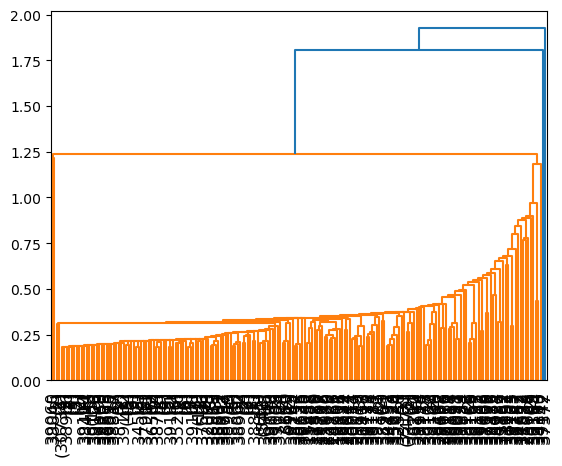

In [52]:
a = dendrogram(linked,
            orientation='top',
            truncate_mode='lastp',  # show only the last p merged clusters
            p=200,  # show only the last p merged clusters
            distance_sort='descending',
            leaf_font_size=12.,
            leaf_rotation=90.,
            show_leaf_counts=True)
plt.show()

In [ ]:
a.

<Axes: xlabel='count', ylabel='searchCnt'>

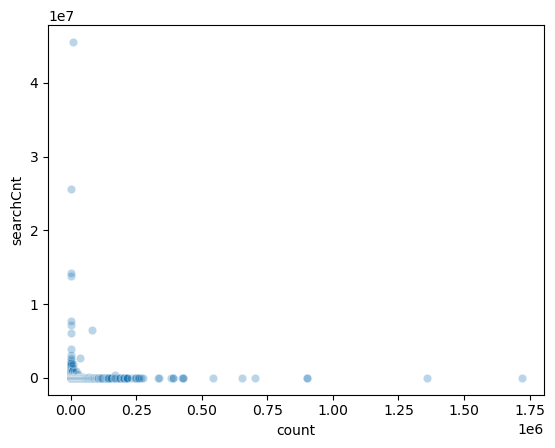

In [28]:
import seaborn as sns

sns.scatterplot(data=df_log, x="count", y="searchCnt", alpha=0.3)

# 3차원 시각화

In [38]:
idx = np.random.choice(len(df_log), 500)
df_log_500 = df_log.iloc[idx, :]

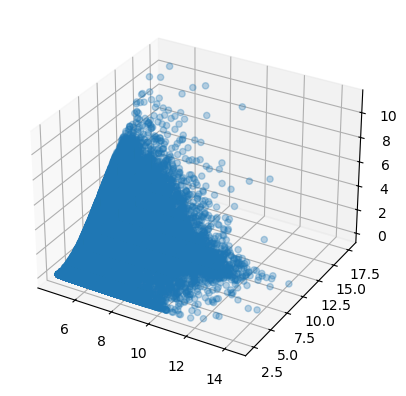

In [39]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df_log["log_count"], df_log["log_searchCnt"], df_log["log_compDiff"], alpha=0.3)

plt.show()

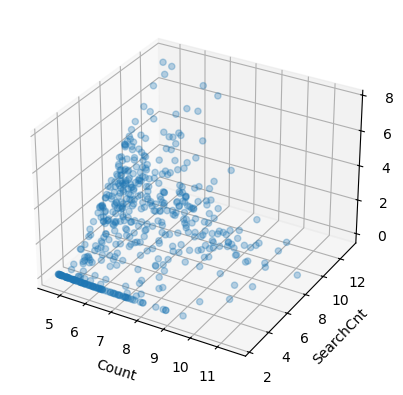

In [75]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df_log_500["log_count"], df_log_500["log_searchCnt"], df_log_500["log_compDiff"], alpha=0.3)

ax.set_xlabel('Count')
ax.set_ylabel('SearchCnt')
ax.set_zlabel('CompDiff')

plt.show()

### 국립국어원 자료 활용

In [79]:
ref = pd.read_csv("국립국어원 기초어휘_품사 태깅 완료.csv")
ref

,어휘,등급,품사
0,가구,2,NNG
1,감,2,NNG
2,거르,2,VV
3,경비원,2,NNG
4,골대,2,NNG
...,...,...,...
9860,상가,1,NNG
9861,생각되,1,VV
9862,선인장,1,NNG
9863,세탁소,1,NNG


# df over 100

In [15]:
import pandas as pd

df = pd.read_csv("word_count_over100.csv")
df

,word,tag,count,count_prop,zipf's_law
0,페리오스,NNP,101,0.000001,17024.485149
1,아츰,NNG,101,0.000001,17024.485149
2,오도문,NNG,101,0.000001,17024.485149
3,무라야마,NNP,101,0.000001,17024.485149
4,장포,NNP,101,0.000001,17024.485149
...,...,...,...,...,...
39183,사람,NNG,701971,0.007617,2.449493
39184,되,VV,899517,0.009760,1.911551
39185,없,VA,901000,0.009776,1.908405
39186,있,VA,1356829,0.014722,1.267273


In [16]:
df2 = pd.read_csv("필수어휘_빈도수추가.csv")
df2

,필수 어휘,어휘 등급\n(김광해),최종\n난도,빈도\n순위,총\n빈도수,종이,인터넷,정치,사회,경제,국제,문화,스포츠,과학,중학\n교과서,초등\n교과서
0,강,1,하,2684,4,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN,○,○
1,개인,1,하,367,57,23.0,34.0,32.0,20.0,1.0,4.0,NaN,NaN,NaN,○,○
2,검사,2,하,633,33,14.0,19.0,9.0,22.0,NaN,NaN,2.0,NaN,NaN,○,○
3,경기,4,중,1525,11,9.0,2.0,3.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,○
4,경로,4,중,2432,5,2.0,3.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,○,○
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,흡연,4,중,2785,3,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,○,○
3311,흥미,2,하,2684,4,NaN,4.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,○,○
3312,희망,1,하,402,53,25.0,28.0,22.0,23.0,2.0,NaN,6.0,NaN,NaN,○,○
3313,희생,2,하,1288,14,7.0,7.0,2.0,6.0,1.0,4.0,1.0,NaN,NaN,○,○


In [18]:
df2.columns = ['word', '어휘 등급\n(김광해)', '최종\n난도', '빈도\n순위', '총\n빈도수', '종이', '인터넷',
       '정치', '사회', '경제', '국제', '문화', '스포츠', '과학', '중학\n교과서', '초등\n교과서']
df2

,word,어휘 등급\n(김광해),최종\n난도,빈도\n순위,총\n빈도수,종이,인터넷,정치,사회,경제,국제,문화,스포츠,과학,중학\n교과서,초등\n교과서
0,강,1,하,2684,4,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN,○,○
1,개인,1,하,367,57,23.0,34.0,32.0,20.0,1.0,4.0,NaN,NaN,NaN,○,○
2,검사,2,하,633,33,14.0,19.0,9.0,22.0,NaN,NaN,2.0,NaN,NaN,○,○
3,경기,4,중,1525,11,9.0,2.0,3.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,○
4,경로,4,중,2432,5,2.0,3.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,○,○
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,흡연,4,중,2785,3,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,○,○
3311,흥미,2,하,2684,4,NaN,4.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,○,○
3312,희망,1,하,402,53,25.0,28.0,22.0,23.0,2.0,NaN,6.0,NaN,NaN,○,○
3313,희생,2,하,1288,14,7.0,7.0,2.0,6.0,1.0,4.0,1.0,NaN,NaN,○,○


In [19]:
# 병합 기준 컬럼 리스트
merge_columns = ['path', 'title', 'author', 'page_number', 'context', 'sentence', 'cleaned_content']

# 데이터프레임 병합
merged_df = pd.merge(df2, df[["word", "count"]], 
                     on="word", how='left')
merged_df

,word,어휘 등급\n(김광해),최종\n난도,빈도\n순위,총\n빈도수,종이,인터넷,정치,사회,경제,국제,문화,스포츠,과학,중학\n교과서,초등\n교과서,count
0,강,1,하,2684,4,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN,○,○,7148.0
1,강,1,하,2684,4,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN,○,○,12329.0
2,개인,1,하,367,57,23.0,34.0,32.0,20.0,1.0,4.0,NaN,NaN,NaN,○,○,21505.0
3,검사,2,하,633,33,14.0,19.0,9.0,22.0,NaN,NaN,2.0,NaN,NaN,○,○,9143.0
4,경기,4,중,1525,11,9.0,2.0,3.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,○,662.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,흡연,4,중,2785,3,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,○,○,480.0
3519,흥미,2,하,2684,4,NaN,4.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,○,○,6715.0
3520,희망,1,하,402,53,25.0,28.0,22.0,23.0,2.0,NaN,6.0,NaN,NaN,○,○,17438.0
3521,희생,2,하,1288,14,7.0,7.0,2.0,6.0,1.0,4.0,1.0,NaN,NaN,○,○,5680.0


In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   word         3523 non-null   object 
 1   어휘 등급
(김광해)  3523 non-null   object 
 2   최종
난도        3523 non-null   object 
 3   빈도
순위        3523 non-null   int64  
 4   총
빈도수        3523 non-null   int64  
 5   종이           2840 non-null   float64
 6   인터넷          3238 non-null   float64
 7   정치           2471 non-null   float64
 8   사회           2613 non-null   float64
 9   경제           1603 non-null   float64
 10  국제           1306 non-null   float64
 11  문화           1701 non-null   float64
 12  스포츠          401 non-null    float64
 13  과학           480 non-null    float64
 14  중학
교과서       2773 non-null   object 
 15  초등
교과서       2081 non-null   object 
 16  count        3101 non-null   float64
dtypes: float64(10), int64(2), object(5)
memory usage: 468.0+ KB


In [ ]:
import pandas as pd

df = pd.read_csv("df_no_author_modernized_before_RAG_with_dialogue_index2.csv")